In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\data science\incomeData.csv")
df

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.nunique()

nan                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Income                2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.dtypes

nan                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [8]:
df.duplicated().sum()

24

In [9]:
df.isnull().sum()

nan               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.rename({'nan':'age'},axis=1,inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education-num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital-gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital-loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [13]:
cor=df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].corr()
cor

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


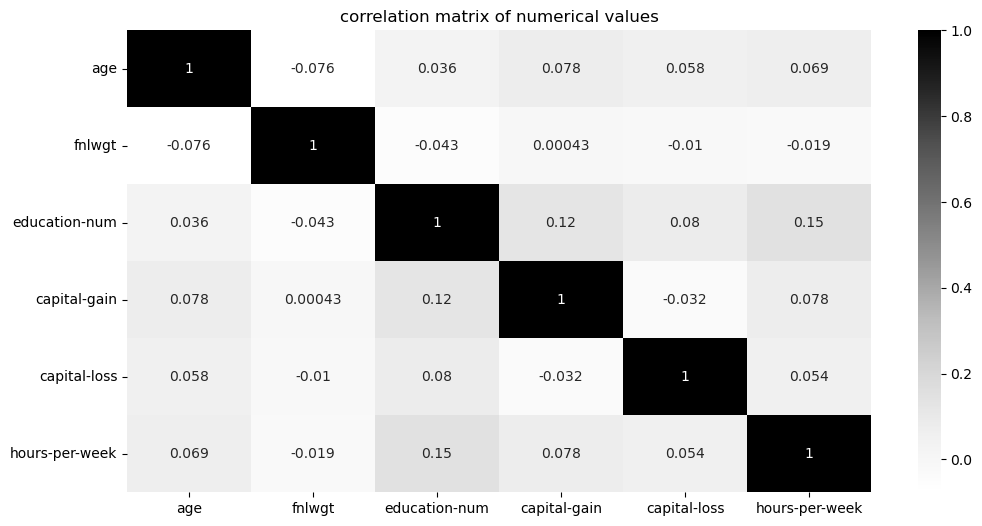

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(cor,cbar=True,annot=True,cmap='Greys')
plt.title('correlation matrix of numerical values')
plt.show()

### there is no much correlation between any of the numerical features

## Check for error values

In [15]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [16]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [17]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [18]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [19]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [21]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [22]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [23]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [24]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [25]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

#### workclass, occupation and native-country has error values

## Treating the error values

In [58]:
df['workclass'].replace({' ?':np.nan},inplace=True)

In [27]:
df['workclass'].isnull().sum()

1836

In [28]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

In [59]:
df['occupation'].replace({' ?':np.nan},inplace=True)

In [30]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)

In [60]:
df['native-country'].replace({' ?':np.nan},inplace=True)

In [32]:
df['native-country'].isnull().sum()

582

In [33]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace=True)

In [34]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

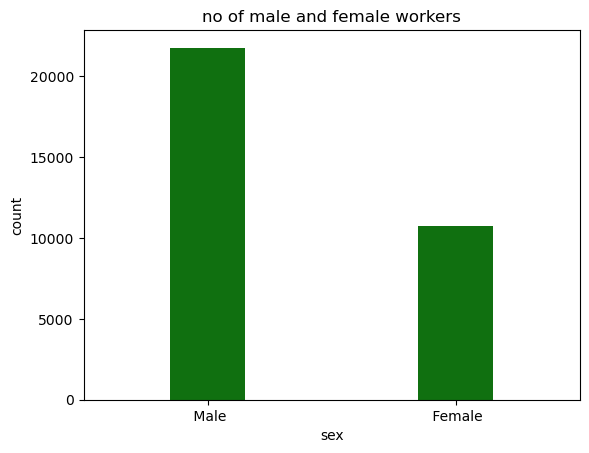

In [35]:
sns.countplot(x=df['sex'],width=0.3,color='green')
plt.title('no of male and female workers')
plt.show()

#### more males are employed than females

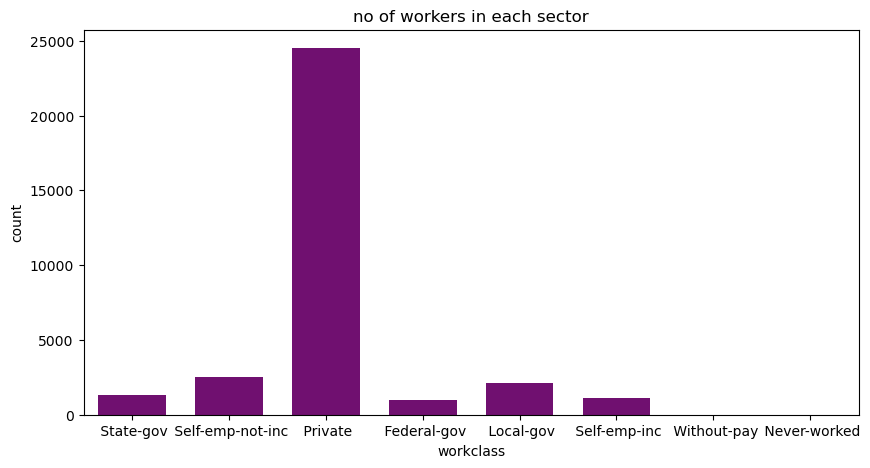

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['workclass'],width=0.7,color='purple')
plt.title('no of workers in each sector')
plt.show()


### more people are employed in private sector

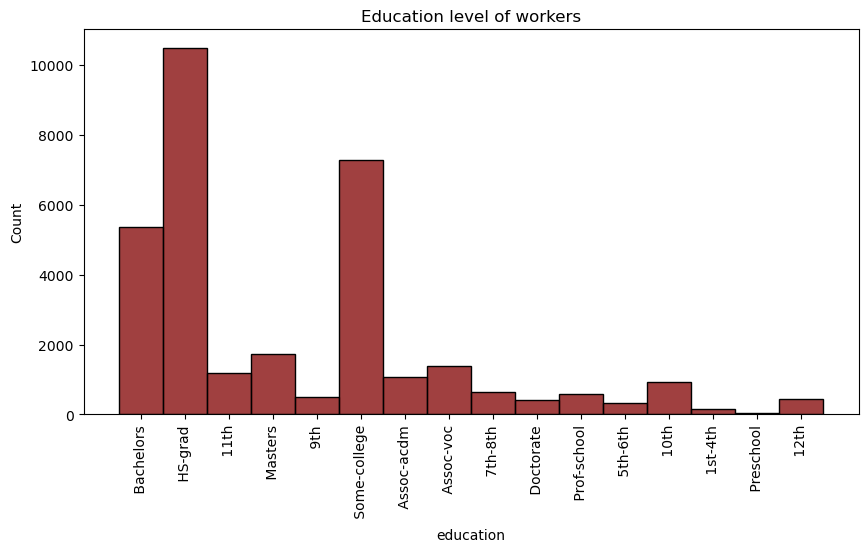

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df['education'],binwidth=0.5,color='maroon')
plt.xticks(rotation=90)
plt.title('Education level of workers')
plt.show()

### most workers are highschool graduates

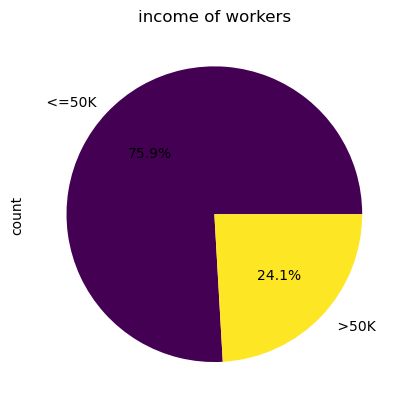

In [38]:
df['Income'].value_counts().plot(kind='pie',cmap='viridis',autopct='%1.1f%%')
plt.title('income of workers')
plt.show()

### more people earn <=50k

In [39]:
hi=df[df['Income']==' >50K']

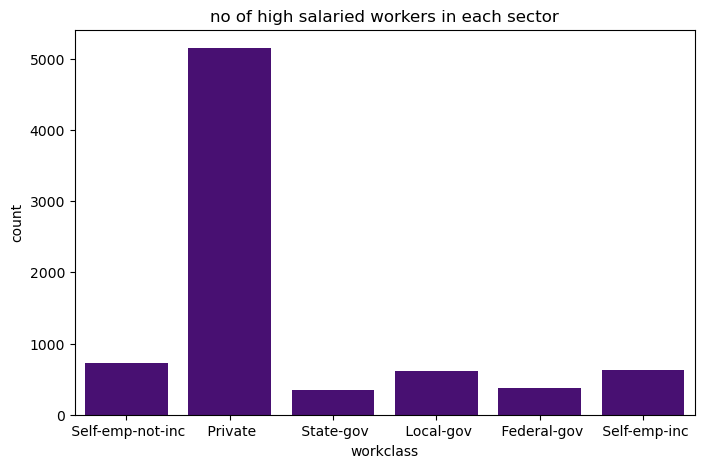

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x=hi['workclass'],color='indigo')
plt.title('no of high salaried workers in each sector')
plt.show()

In [41]:
li=df[df['Income']==' <=50K']


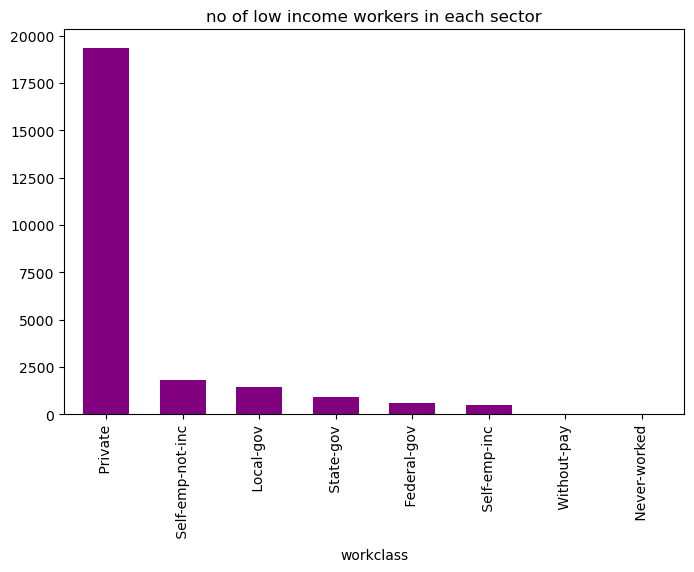

In [42]:
plt.figure(figsize=(8,5))
li['workclass'].value_counts().plot(kind='bar',width=0.6,color='purple')
plt.title('no of low income workers in each sector')
plt.show()

#### workers who earn more than 50k are in private sector,but more workers in private sector earn <=50k

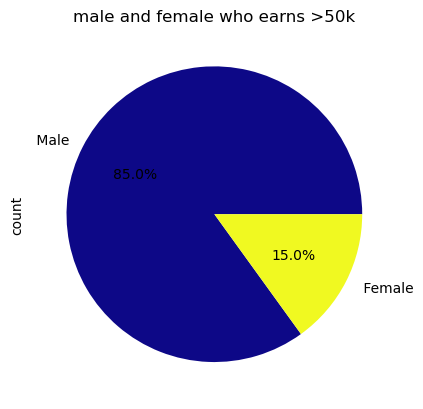

In [43]:
hi['sex'].value_counts().plot(kind='pie',colormap='plasma',autopct='%1.1f%%')
plt.title('male and female who earns >50k')
plt.show()

### males earn more than 50k than females

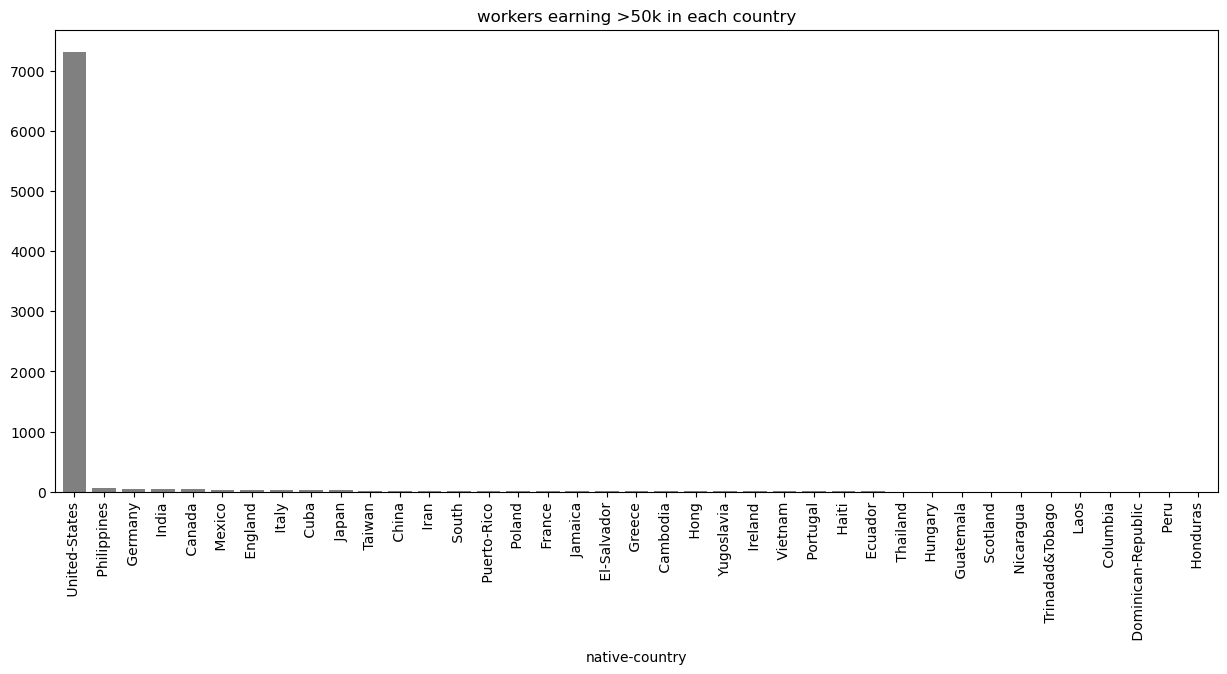

In [44]:
plt.figure(figsize=(15,6))
hi['native-country'].value_counts().plot(kind='bar',width=0.8,color='grey')
plt.title('workers earning >50k in each country')
plt.show()

### more workers in US earns >50k 

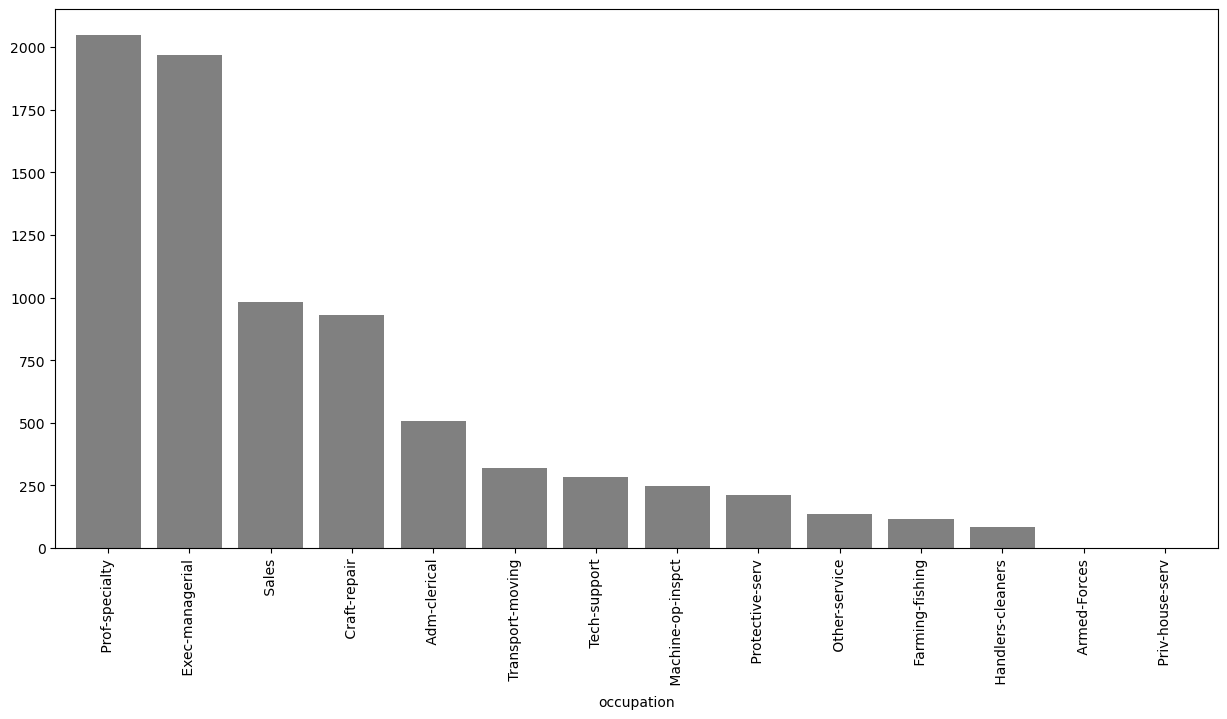

In [61]:
plt.figure(figsize=(15,7))
hi['occupation'].value_counts().plot(kind='bar',width=0.8,color='grey')
plt.show()

#### Prof-speciality workers earns higher income compared to other jobs

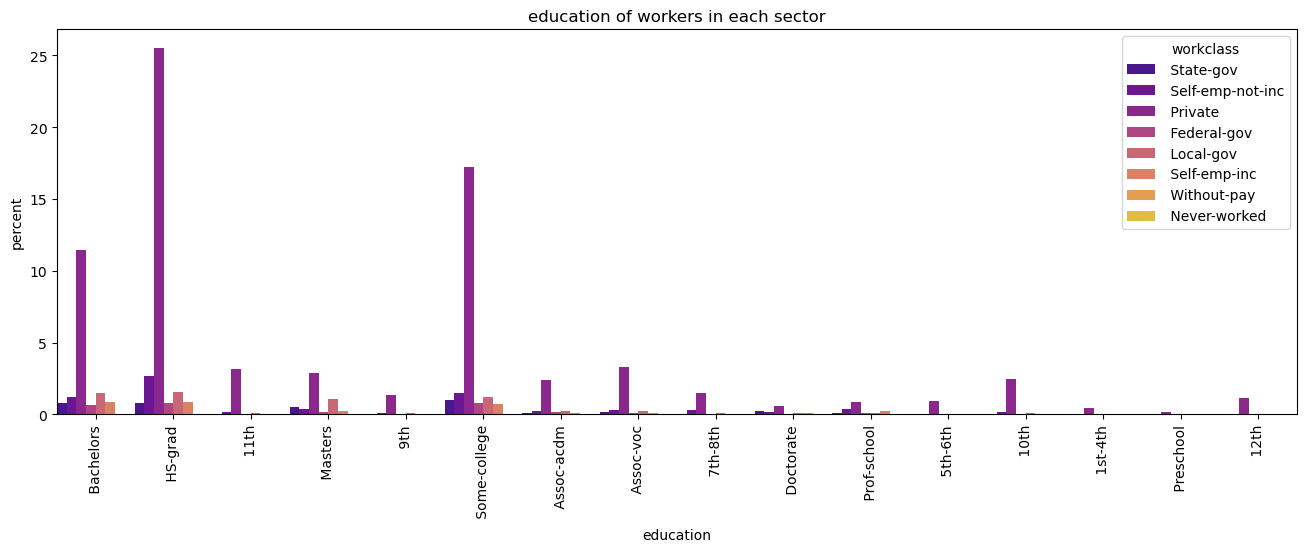

In [46]:
plt.figure(figsize = (16, 5))
sns.countplot(data=df, x="education", stat="percent", hue="workclass", palette="plasma",width=1)
plt.title('education of workers in each sector')
plt.xticks(rotation=90)
plt.show()

### majority of the workclass from different education groups work in the private sector.

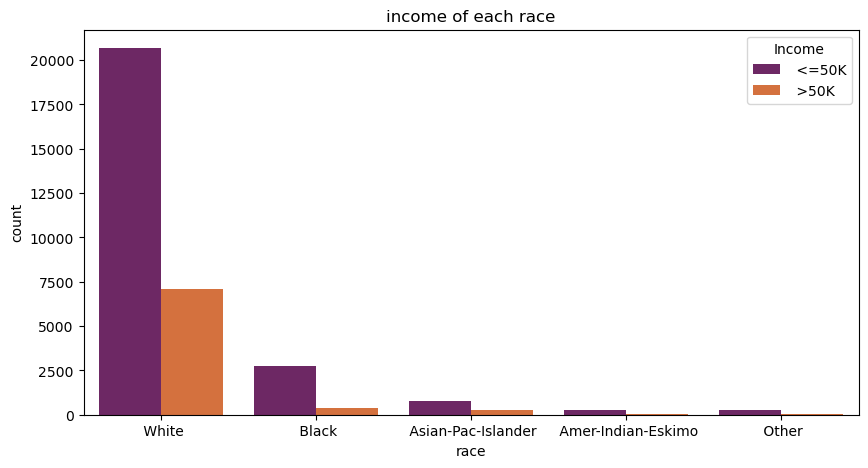

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="race",hue="Income", palette="inferno")
plt.title('income of each race')
plt.show()

### the whites earn significantly more than other race

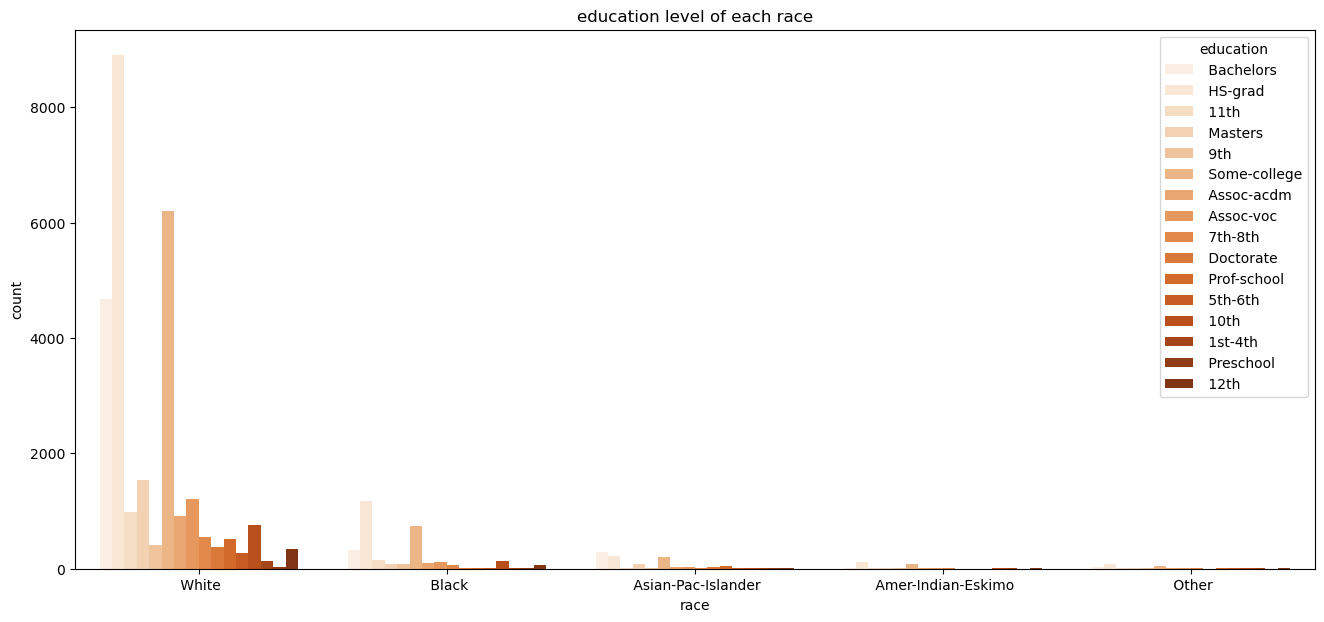

In [48]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, x="race", hue="education", palette="Oranges")
plt.title('education level of each race')
plt.show()

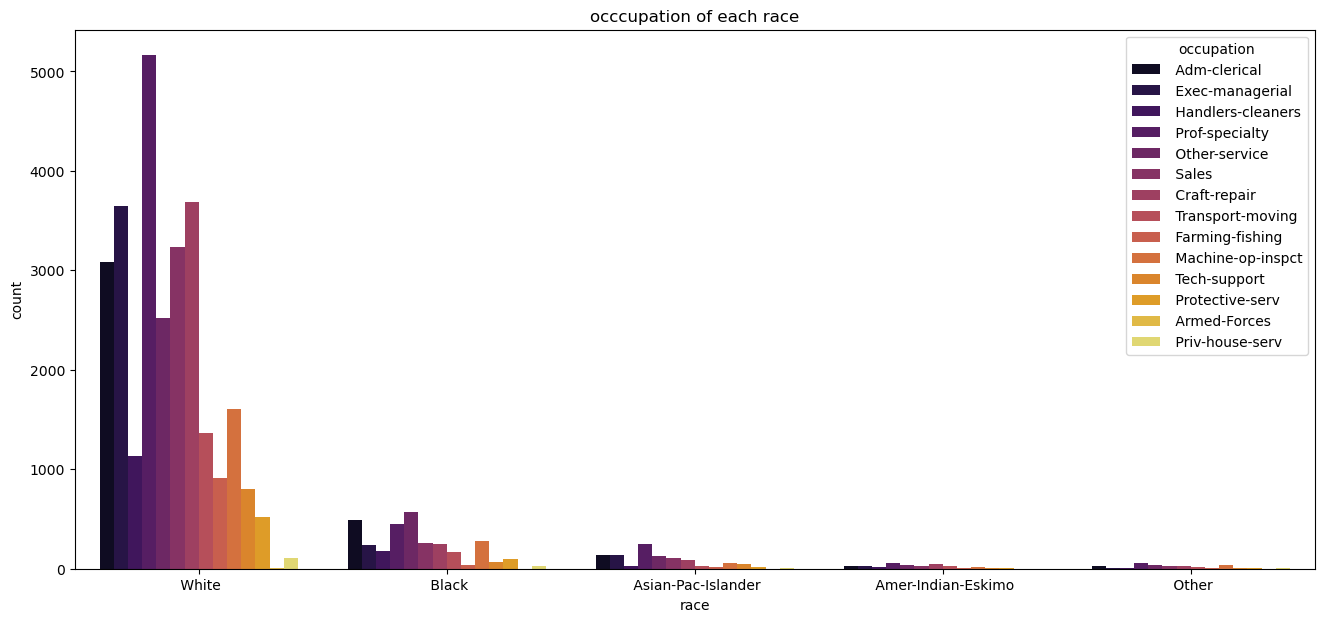

In [49]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, x="race", hue="occupation", palette="inferno")
plt.title('occcupation of each race')
plt.show()

### the whites are more educated and employed hence they earn more compared to other races

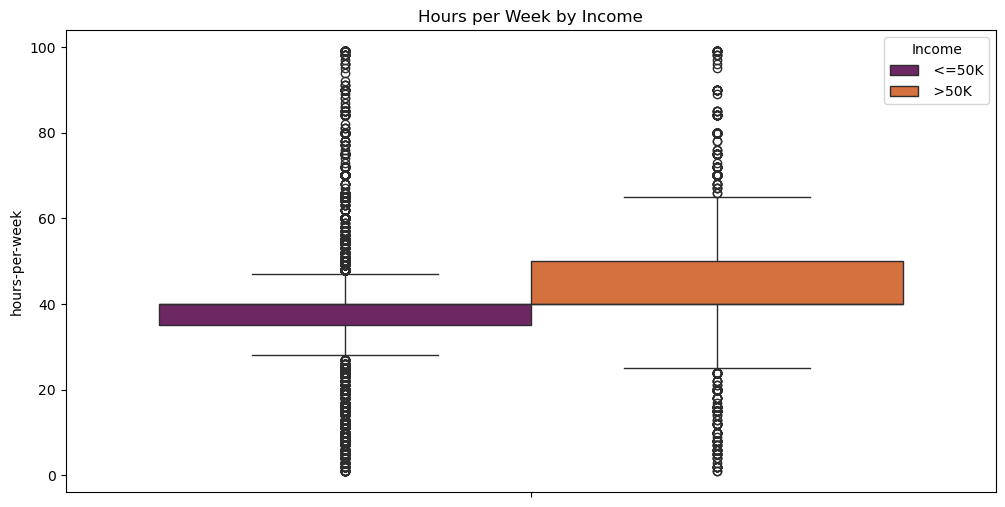

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, hue='Income',y='hours-per-week',palette='inferno')
plt.title('Hours per Week by Income')
plt.show()

### higher-income individuals are more likely to work longer hours,also more people who earn <=50k works 40 hrs a week

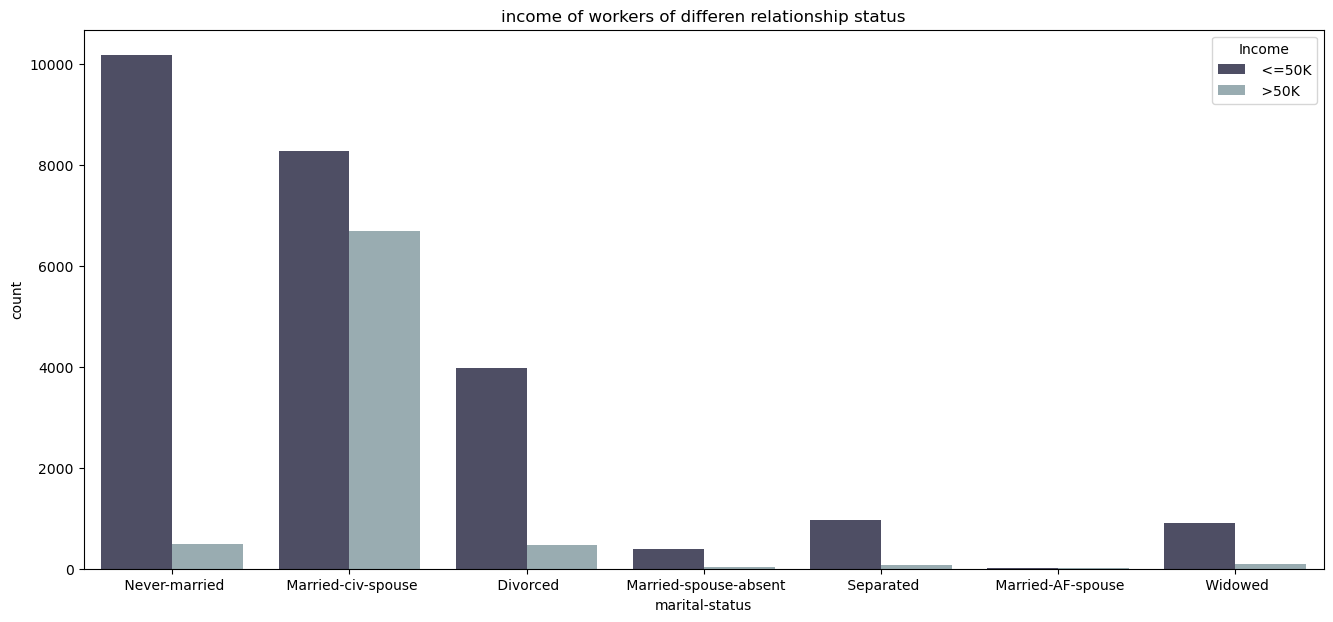

In [51]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, x="marital-status", hue="Income", palette="bone")
plt.title('income of workers of differen relationship status')
plt.show()

### workers who have never married earns higher income

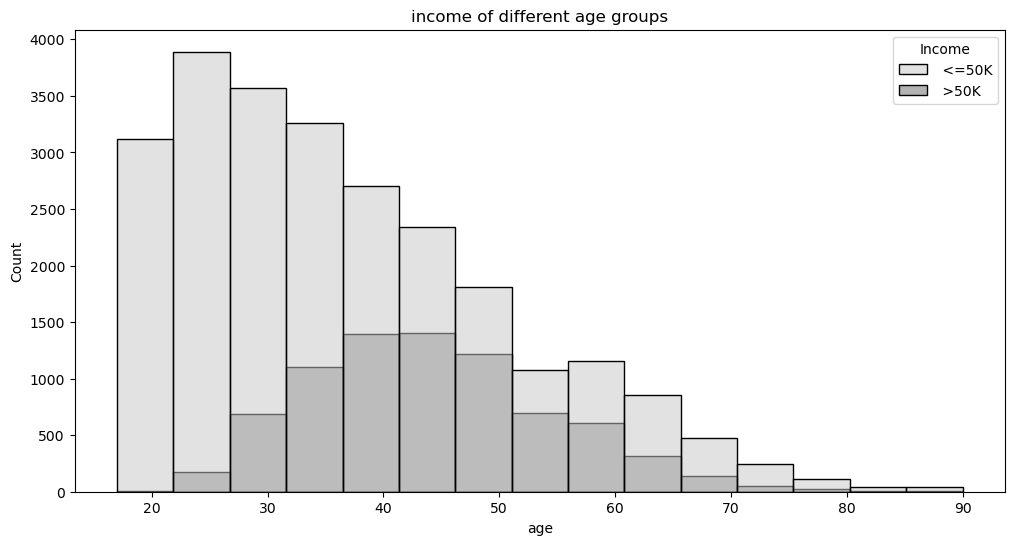

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='Income',binwidth=5,palette='Greys')
plt.title('income of different age groups')
plt.show()

#### workers of ages between 35 to 45 earns higher income while young workers of ages 19 and 20 earn less income

## Conclusion
* There is no much correlation between any of the numerical features in the data
* More males are employed than females
* More people are employed in private sector
* Most workers are highschool graduates
* Most workers income is <=50k
* Workers who earn more than 50k are in private sector,but more workers in private sector earn <=50k
* More workers in US earns >50k compared to other countries
* Prof-speciality workers earns higher income compared to other jobs
* Majority of the workclass from different education groups work in the private sector.
* The whites are more educated and employed hence they earn more compared to other races
* Higher-income individuals are more likely to work longer hours,also more people who earn <=50k works 40 hrs a week
* Workers who have never married earns higher income
* Workers of ages between 35 to 45 earns higher income while young workers of ages 19 and 20 earn less income